In [35]:
# Imports

# Data tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit learn processing tools
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import KFold

# scitkit learn models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# scikit learn metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Imbalanced Learn
from imblearn.over_sampling import RandomOverSampler

# misc
from pprint import pprint

In [2]:
# Set options
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
# Binary confusion matrices are consturcted as follows:
# [[tn, fp],
#  [fn, tp]]

In [4]:
def print_scores(estimator, estimator_title, xtr, xtst, ytr, ytst):
    print('{} Score train:'.format(estimator_title), estimator.score(xtr, ytr))
    print('{} Score test:'.format(estimator_title), estimator.score(xtst, ytst))
    print(classification_report(ytst, estimator.predict(xtst)))

In [5]:
def confmat_to_values(conf_matrix):
    """Converts a binary scikit learn confusion matrix to a cmv named tuple so it easier
    to understand the internal values.
    
    Input:
        a binary scikit learn confusion matrix
    Output:
        a cmv named tuple"""
    return cmv(conf_matrix[1,1], conf_matrix[0,1], conf_matrix[0,0], conf_matrix[1,0])

In [6]:
def accuracy(cm):
    cm_values = confmat_to_values(cm)
    total_observations = cm_values.tp + cm_values.fp + cm_values.tn + cm_values.fn
    return ((cm_values.tp + cm_values.tn) / total_observations)

In [7]:
def precision(cm):
    cm_values = confmat_to_values(cm)
    return cm_values.tp / (cm_values.tp +cm_values.fp)

In [8]:
def recall(cm):
    cm_values = confmat_to_values(cm)
    return cm_values.tp / (cm_values.tp + cm_values.fn)

In [9]:
def f1score(cm):
    cm_values = confmat_to_values(cm)
    return (2 * cm_values.tp) / ((2 * cm_values.tp) + cm_values.fp + cm_values.fn)

In [10]:
# Read in data set
tc = pd.read_csv('../data/processed/telecom_churn_cleaned.csv')
tc.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510,churn
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
tc.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.015602,0.024002,0.016502,0.019202,0.010201,0.019802,0.022202,0.016202,0.018302,0.018902,0.016202,0.015902,0.013201,0.021902,0.017402,0.021302,0.021002,0.017702,0.015302,0.019502,0.021002,0.018602,0.021902,0.025203,0.018902,0.019502,0.020402,0.020402,0.018602,0.018302,0.016802,0.020402,0.018602,0.019802,0.024902,0.023402,0.018302,0.023402,0.013501,0.019502,0.018002,0.018002,0.015902,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.251425,0.496550,0.252025,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.123947,0.153079,0.127414,0.137255,0.100499,0.139340,0.147363,0.126269,0.134061,0.136199,0.126269,0.125114,0.114153,0.146386,0.130782,0.144411,0.143413,0.131885,0.122768,0.138302,0.143413,0.135134,0.146386,0.156763,0.136199,0.138302,0.141392,0.141392,0.135134,0.134061,0.128547,0.141392,0.135134,0.139340,0.155851,0.151200,0.134061,0.151200,0.115426,0.138302,0.132978,0.132978,0.125114,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.433897,0.500063,0.434241,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50

In [12]:
tc = tc.drop('CA', axis=1)
tc.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510,churn
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
# Set up train/test split, create some extra copies to investigate scaling
y_orig = tc['churn'].values.copy()
X_orig = tc.drop('churn', axis=1).copy()
X = X_orig.copy()
y = y_orig.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,AK,AL,AR,AZ,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510
817,243,0.0,0.0,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1373,108,0.0,0.0,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
679,75,1.0,0.0,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
56,141,0.0,0.0,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1993,86,0.0,0.0,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Begin Modeling:  
The percentage of churn is 14.5% from the original data set so any accuracy score needs to be at least 85.5% just to be more advanced that simply predicitng no churn will happen.

### Logistic Regression

In [33]:
# Set up a Logistic Regression with cross validation
# cs = [10000, 100000, 200000, 300000]
cs = [10000, 15000, 100000, 200000, 300000]
lrcv = LogisticRegressionCV(Cs=cs, solver='lbfgs', max_iter=10000, cv=5, scoring='f1')
_ = lrcv.fit(X_train, y_train)

In [34]:
print_scores(lrcv, 'LRCV', X_train, X_test, y_train, y_test)

LRCV Score train: 0.37251356238698013
LRCV Score test: 0.30656934306569344
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



/Applications/conda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:2257: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
/Applications/conda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:2257: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


array([[551,  15],
       [ 80,  21]])


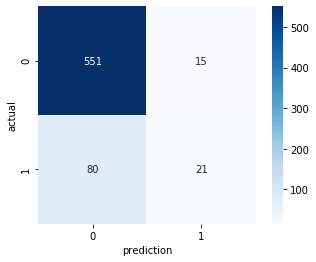

In [28]:
pprint(confusion_matrix(y_test, lrcv.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, lrcv.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['TN [0]', 'FN1']);
plt.xlabel('prediction')
plt.ylabel('actual');

ROC AUC score =  0.8099744603435609


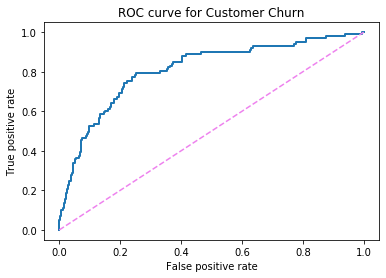

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, lrcv.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Customer Churn');
print("ROC AUC score = ", roc_auc_score(y_test, lrcv.predict_proba(X_test)[:,1]))

<BarContainer object of 4 artists>

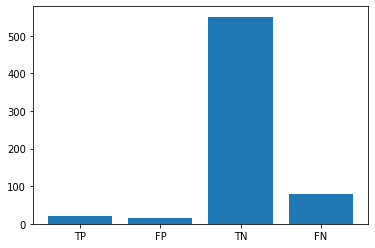

In [29]:
cm = confusion_matrix(y_test, lrcv.predict(X_test))
cm_list = [cm[1][1], cm[0][1], cm[0][0], cm[1][0]]
cm_labels = ['TP', 'FP', 'TN', 'FN']
plt.bar(cm_labels, cm_list)

### Naive Bayes

In [ ]:
nb = GaussianNB()
_ = nb.fit(X_train, y_train)

In [ ]:
print_scores(nb, 'NB', X_train, X_test, y_train, y_test)

### Support Vector Machines

In [ ]:
svc = SVC(kernel='linear', class_weight='balanced')
_ = svc.fit(X_train, y_train)

In [ ]:
print_scores(svc, 'SVC', X_train, X_test, y_train, y_test)

### KNN

In [ ]:
knn = KNeighborsClassifier()
_ = knn.fit(X_train, y_train)

In [ ]:
print_scores(knn, 'KNN', X_train, X_test, y_train, y_test)

### Random Forest Classifier

In [46]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
_ = rf.fit(X_train, y_train)

In [47]:
print_scores(rf, 'RF', X_train, X_test, y_train, y_test)

RF Score train: 1.0
RF Score test: 0.9415292353823088
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       566
           1       1.00      0.61      0.76       101

    accuracy                           0.94       667
   macro avg       0.97      0.81      0.86       667
weighted avg       0.95      0.94      0.94       667



ROC AUC score =  0.9343228492460552


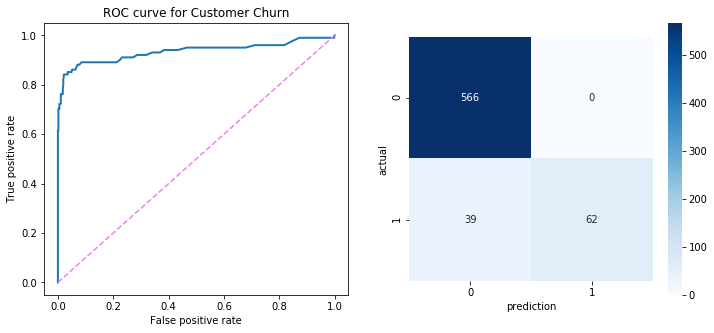

In [62]:
plt.figure(figsize=(12, 5))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Customer Churn');
print("ROC AUC score = ", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test)), cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
plt.xlabel('prediction')
plt.ylabel('actual');

<BarContainer object of 4 artists>

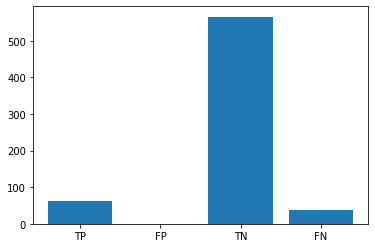

In [52]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm_list = [cm[1][1], cm[0][1], cm[0][0], cm[1][0]]
cm_labels = ['TP', 'FP', 'TN', 'FN']
plt.bar(cm_labels, cm_list)

### Create a balanced dataset for testing

In [ ]:
# Create a new dataframe with an increased number of churn customers.
df_yes = tc[tc['churn'] == 1]
df_no = tc[tc['churn'] == 0]
df_yes_upsample = resample(df_yes, replace=True, n_samples=df_no.shape[0], random_state=42)
df_balanced = pd.concat((df_yes_upsample, df_no))

In [ ]:
# Split the new dataframe into train/test split
bX_train, bX_test, by_train, by_test = train_test_split(df_balanced.drop('churn', axis=1),
                                                                         df_balanced['churn'],
                                                                         test_size=0.2,
                                                                         random_state=42,
                                                                         shuffle=True)

### Logistic Regeression on Balanced Data

In [ ]:
# Set up a Logistic Regression with cross validation
# cs = [10000, 100000, 200000, 300000]
cs = [10000, 15000, 100000, 200000, 300000]
lrcv = LogisticRegressionCV(Cs=cs, solver='lbfgs', max_iter=10000, cv=5)
_ = lrcv.fit(bX_train, by_train)

In [ ]:
print_scores(lrcv, 'LRCV', bX_train, bX_test, by_train, by_test)

### Naive Bayes on Balanced Data

In [ ]:
nb = GaussianNB()
_ = nb.fit(bX_train, by_train)

In [ ]:
print_scores(nb, 'NB', bX_train, bX_test, by_train, by_test)

### Support Vector Machines on Balanced Data

In [ ]:
svc = SVC(kernel='linear', class_weight='balanced')
_ = svc.fit(bX_train, by_train)

In [ ]:
print_scores(svc, 'SVC', bX_train, bX_test, by_train, by_test)

### KNN on Balanced Data

In [ ]:
knn = KNeighborsClassifier()
_ = knn.fit(bX_train, by_train)

In [ ]:
print_scores(knn, 'KNN', bX_train, bX_test, by_train, by_test)

In [ ]:
knn_test = []
knn_nn = [2, 3, 4, 5, 6]
for k in knn_nn:
    knn = KNeighborsClassifier(n_neighbors=k)
    _ = knn.fit(bX_train, by_train)
    knn_test.append(knn.score(bX_test, by_test))
knn_test

### Pipelines and Cross_Val_Score with Imbalanced Learn Balancing

In [ ]:
KFold(n_splits=5, shuffle=True, random_state=42)